## Exploring Datasets with pandas and Matplotlib

### Downloading and Preparing Data

In [1]:
# useful for many scientific computing in Python
import numpy as np

# primary data strcuture Library
import pandas as pd

### Introduction to Folium

In [2]:
# conda install -c conda-forge folium
import folium

print("Folium installed and Imported!")

Folium installed and Imported!


In [3]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [4]:
# define the world map centered around Semarang with a low zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# display world map
world_map

Mari kita buat peta lagi dengan tingkat zoom yang lebih tinggi

In [5]:
# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

# display world map
world_map

<b>Pertanyaan :</b> Create a map of Hacktiv8 with a zoom level of 15

In [6]:
# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)

# display world map
world_map

#### A Stamen Toner Maps

Stamen Toner adalah peta B+W (hitam dan putih) dengan kontras tinggi. Stamen Toner sempurna untuk data mashup dan menjelajahi kelokan sungai/river meanders dan zona pesisir/coastal zones.

In [7]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=15, tiles="Stamen Toner")

# display world map
world_map

#### B Stamen Terrain Maps

Stamen Terrain adalah peta yang menampilkan bayangan bukit dan warna vegetasi alami. Stamen Terrain menampilkan pelabelan lanjutan dan generalisasi garis dari jalan dengan dua jalur.

In [8]:
# create a Stamen Toner map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles="Stamen Terrain")

# display world map
world_map

### Maps with Markers

Link import file = 
https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv

In [9]:
df_incidents = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv")

print("Dataset downloaded and read into a pandas dataframe!")

Dataset downloaded and read into a pandas dataframe!


In [10]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


Catatan
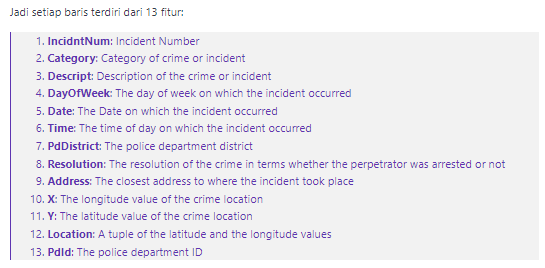

In [11]:
df_incidents.shape

(150500, 13)

Jadi dataframe kita terdiri dari 150.500 kejahatan, yang terjadi pada tahun 2016. Untuk mengurangi computational cost, mari kita bekerja dengan hanya  100 insiden pertama dalam kumpulan data ini.

In [12]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [13]:
# Cek ulang jumlah data
df_incidents.shape

(100, 13)

In [14]:
# San Francisco Latitude and longitude values
latitude = 37.77
longitude = -122.42

In [15]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start = 12)

# display the map of San Francisco
sanfran_map

Sekarang mari kita taruh lokasi kejahatan ke dalam peta. Cara untuk melakukannya di Folium adalah dengan membuat <i>feature group</i> dengan fitur dan gayanya sendiri, lalu menambahkannya ke sanfran_map

In [16]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            # define how big you want the circle markers to be
            radius=5,
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

Menambahkan marker, untuk setiap kategori kejahatan

In [17]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            # define how big you want the circle markers to be
            radius=5,
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitude = list(df_incidents.Y)
longitude = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitude, longitude, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# add incidents to map
sanfran_map.add_child(incidents)

In [20]:
# create map and display it
latitude = 37.77
longitude = -122.42
sanFran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through 100 crimes and add each to the map
for lat, lang, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker([lat, lang],
                        radius=5,
                        color='yellow',
                        fill='True',
                        popup=label,
                        fill_color='blue',
                        fill_opacity=0.6,
                        ).add_to(sanFran_map)
sanFran_map

In [21]:
from folium import plugins

# let's strart again with a clean copy of the map of San Francisco
latitude = 37.77
longitude = -122.42
sanFran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanFran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lang, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(location=[lat, lang],
                  icon=None,
                  popup=label,
                  ).add_to(incidents)
sanFran_map

### Choropleth Maps

Chorlopeth adalah peta tematik di mana area diarsir atau berpola sebanding dengan pengukuran variabel statistik yang ditampilkan di peta, seperti kepadatan penduduk atau pendapatan per kapita. Peta choropleth memberikan cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis atau menunjukkan tingkat variabilitas dalam suatu wilayah. Di bawah ini adalah peta 

In [22]:
df_can = pd.read_excel("https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true",
                       sheet_name="Canada by Citizenship",
                       skiprows=range(20),
                       skipfooter=2
                      )

print("Data download and read into a dataframe!")

Data download and read into a dataframe!


In [23]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [24]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [25]:
# clean up the dataset to remove unnecessary columns (eg. REG)
df_can.drop(["AREA", "REG", "DEV", "Type", "Coverage"], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={"OdName":"Country",
                       "AreaName":"Continent",
                       "RegName":"Region"
                      },
              inplace=True
             )

# for sake of consitency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can["Total"] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print("Data dimensions:", df_can.shape)

Data dimensions: (195, 39)


<ipython-input-25-a269399aa7cf>:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can["Total"] = df_can.sum(axis=1)


In [26]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [41]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
    
print("GeoJSON file downloaded!")

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [50]:
# geoJSON file
world_geo = r"assets/world_countries.json"

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles="OpenStreetMap")

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=["Country", "Total"],
    key_on="feature.properties.name",
    # Yl -> Yellow
    # Or -> Orange
    # Rd -> Red
    fill_color="YlOrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Immigration to Canada"
)

# display map
world_map

C:\Users\asus\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
